In [32]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt
import libfmp.b

In [3]:
csv_test = pd.read_csv('../corpus/chords_sequences/MoonRiver.csv')
csv_test

,Measure,MoonRiver,chord_note,Time
0,1,Cmaj7,C,0.00
1,2,Amin7,A,1.50
2,3,F7(#11),F,3.00
3,4,Cmaj7,C,4.50
4,5,F7,F,6.00
5,6,Cmaj7,C,7.50
6,7,Bmin7(b5),B,9.00
7,8,E7,E,10.50
8,9,Amin7,A,12.00
9,10,C7/G,C,13.50


In [4]:
y_test, sr_test = librosa.load('../../big_corpus/wav_music21/MoonRiver.wav'
#                      , duration=20
                    )

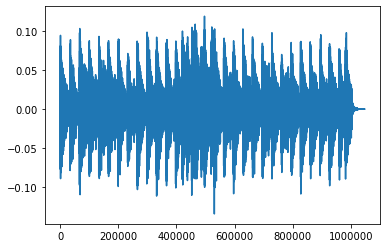

In [7]:
plt.plot(y_test)

Convertendo para segundos:

In [16]:
segs = np.linspace(0,
                   len(y_test)/sr_test, 
                   num=len(y_test))

Text(0.5, 0, 'time (s)')

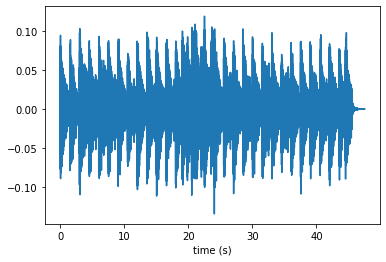

In [18]:
plt.plot(segs, y_test)
plt.xlabel('time (s)')

In [24]:
df_test = pd.DataFrame({'seconds':segs, 'signal': y_test})

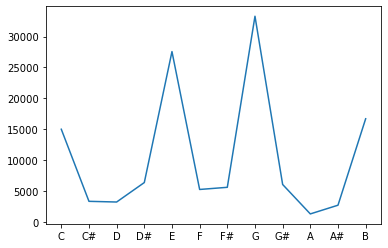

In [46]:
cut = 1.5
df_cut = df_test[df_test.seconds < cut]
# df_chroma = 
chroma_test = librosa.feature.chroma_stft(y=df_cut['signal'].values, 
                                        sr=sr_test, 
                                        tuning=0, 
                                        norm=None, 
                                        hop_length=len(df_cut), 
                                        n_fft=len(df_cut))


plt.plot(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],
          chroma_test);

O vetor acima (com 12 componentes) é um exemplo do que será o input do nosso modelo. Vemos que realmente faz sentido, visto que no trecho escolhido a harmonia ali presente é Cmaj7 e, de fato, as principais frequências que encontramos foram C, E, G e B, notas que compõem este acorde.